# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate performance 

## Boston Housing dataset - again! 

The dataset is available in the file `'boston.csv'`. 

- Import the dataset and print its `.head()` and dimensions: 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Boston housing dataset 
data = pd.read_csv("./boston.csv") 

# Print the first five rows 
print(data.head(), data.tail())

# Print the dimensions of data
print(data.shape)

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2        Unnamed: 0     crim   zn  indus  chas    nox     rm   age     dis  rad  \
501         502  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076  0.0  11.93     0  0.573  6.976  91

## Identify features and target data 

In this lab, we will use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`: 

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood 
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor) 
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood 

#### Target
- `MEDV`',the median value of the home 

- Create DataFrames for features and target as shown above 
- Inspect the contents for validity 

In [6]:
# Features and target data
target = data['medv']
#features = data.drop('medv', axis=1)
features = data[['rm', 'lstat', 'ptratio']]
print(target.head())
print(features.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64
      rm  lstat  ptratio
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7


## Inspect correlations 

- Use scatter plots to show the correlation between chosen features and target variable
- Comment on each scatter plot 

In [22]:
features.columns

Index(['rm', 'lstat', 'ptratio'], dtype='object')

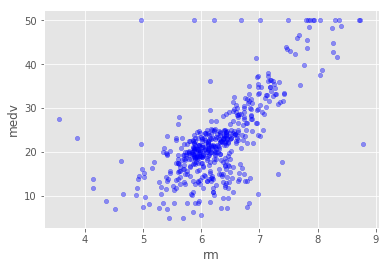

In [28]:
data.plot(kind='scatter', x='rm', y='medv',alpha=0.4, color='b')

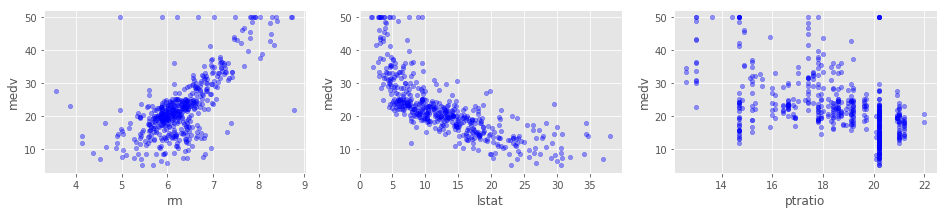

In [31]:
# Review linearity and categorical data - using scatterplot
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))
for xcol, ax1 in zip(list(features.columns)[0:3], axes):
    data.plot(kind='scatter', x=xcol, y='medv', ax=ax1, alpha=0.4, color='b')

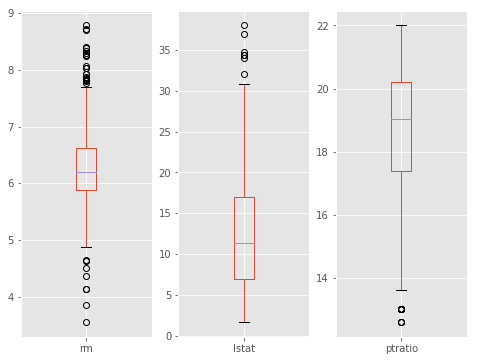

In [14]:
# Your code here 
features.plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False, figsize=(8,6) )# layout=(1,5), figsize=(14,4)
plt.show()

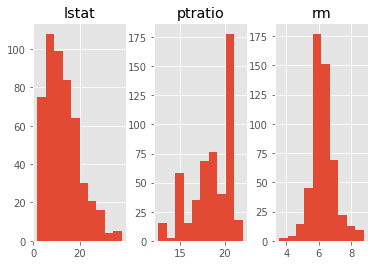

In [18]:
features.hist(layout=(1,3));

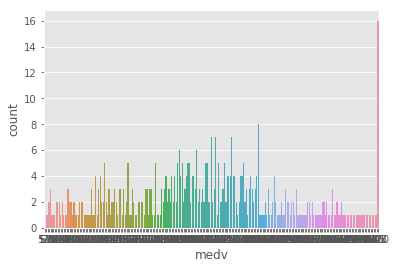

In [15]:
sns.countplot(data['medv'])

## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return the r-squared score and MSE for two equal sized arrays for the given true and predicted values 

In [33]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error 

# Define the function
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)
    
    # Calculate the mean squared error between 'y_true' and 'y_predict'
    mse = mean_squared_error(y_true, y_predict)
    
    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = np.sqrt(mean_squared_error(y_true, y_predict))
    
    # Return the score
    
    print(f'r2_score: {r2}')
    print(f'mean_squared_error: {mse}')
    print(f'root mean_squared_error: {rmse}')
    
    return [r2, mse, rmse]


# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.4719999999999998]

r2_score: 0.9228556485355649
mean_squared_error: 0.4719999999999998
root mean_squared_error: 0.6870225614927066


[0.9228556485355649, 0.4719999999999998, 0.6870225614927066]

## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [36]:
from sklearn.model_selection import train_test_split 

# Split the data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print (X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 3) (404,)
(102, 3) (102,)


## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [37]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
regressor = DecisionTreeRegressor()

# Fit the model to training data
model = regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

# [0.47097115950374013, 38.795686274509805]  - R2, MSE

r2_score: 0.47831068667556154
mean_squared_error: 38.25745098039216
root mean_squared_error: 6.185260785156286


[0.47831068667556154, 38.25745098039216, 6.185260785156286]

## Hyperparameter tuning (I)

- Find the best tree depth for a depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures, for all runs 
- Comment on the output 

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]

Max Depth: 1.0
r2_score: 0.3602156982888397
mean_squared_error: 46.91780325106487
root mean_squared_error: 6.8496571630312175

Max Depth: 2.0
r2_score: 0.645549571073612
mean_squared_error: 25.9931908959712
root mean_squared_error: 5.098351782289174

Max Depth: 3.0
r2_score: 0.6679219352208099
mean_squared_error: 24.35254079481681
root mean_squared_error: 4.934829358226768

Max Depth: 4.0
r2_score: 0.7226546855127474
mean_squared_error: 20.338781153139767
root mean_squared_error: 4.509853784008941

Max Depth: 5.0
r2_score: 0.746527856459061
mean_squared_error: 18.588071211613478
root mean_squared_error: 4.3113885479754055

Max Depth: 6.0
r2_score: 0.7515894043185498
mean_squared_error: 18.216888758430127
root mean_squared_error: 4.2681247355753476

Max Depth: 7.0
r2_score: 0.6263488910856303
mean_squared_error: 27.401249398740603
root mean_squared_error: 5.2346202

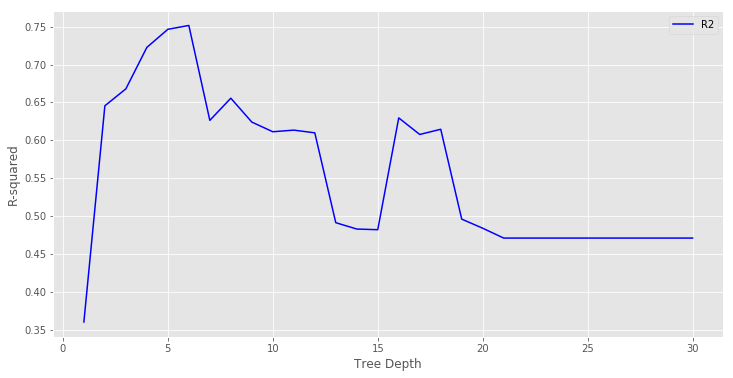

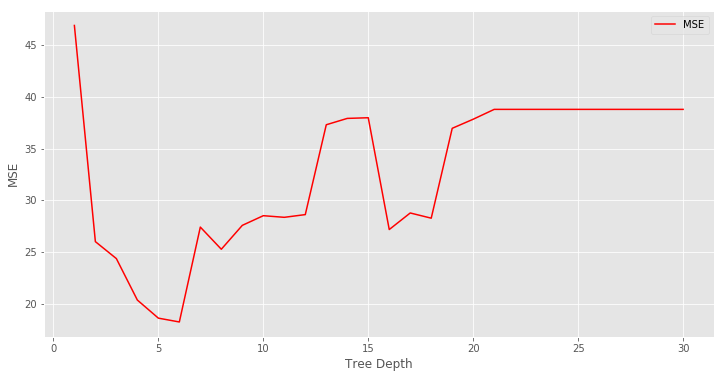

In [50]:
# Your code here 
max_depths  = np.linspace(1, 30, 30, endpoint=True)
print(max_depths)
mse_results = []
r2_results = []
for depth in max_depths:
    # Instantiate DecisionTreeRegressor 
    print(f'\nMax Depth: {depth}')
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=45)
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = performance(y_test, y_pred)
    score
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()
    

## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

range(1, 30)

Min Sample Leaf Depth: 1
r2_score: 0.7515894043185498
mean_squared_error: 18.216888758430127
root mean_squared_error: 4.2681247355753476

Min Sample Leaf Depth: 2
r2_score: 0.740201539840109
mean_squared_error: 19.052003942751252
root mean_squared_error: 4.364860128658335

Min Sample Leaf Depth: 3
r2_score: 0.761128258322576
mean_squared_error: 17.517368507300887
root mean_squared_error: 4.185375551524724

Min Sample Leaf Depth: 4
r2_score: 0.7436673398444009
mean_squared_error: 18.797843716759463
root mean_squared_error: 4.335648015782585

Min Sample Leaf Depth: 5
r2_score: 0.7594657649453583
mean_squared_error: 17.639285436131246
root mean_squared_error: 4.199914932011271

Min Sample Leaf Depth: 6
r2_score: 0.7618724179534291
mean_squared_error: 17.46279646629525
root mean_squared_error: 4.178851094056266

Min Sample Leaf Depth: 7
r2_score: 0.7652398715057029
mean_squared_error: 17.215848357690334
root mean_squared_error: 4.149198519918074

Min Sample Leaf Depth: 8
r2_s

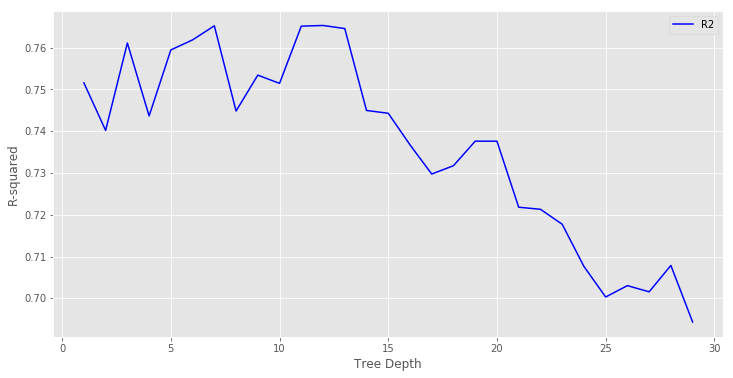

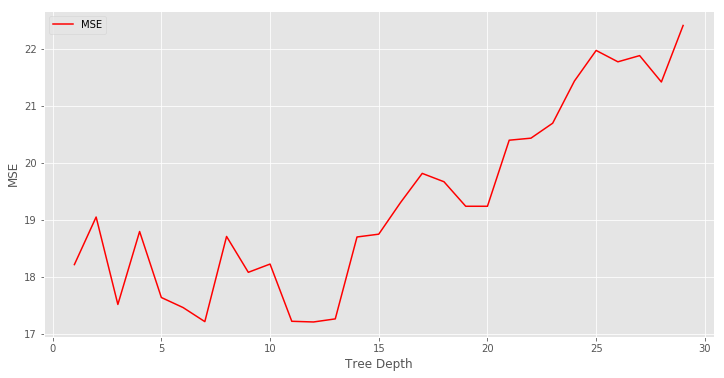

In [54]:
# Your code here 
# Your code here 
# min_depths  = np.linspace(1, 30, 30, endpoint=True)
min_depths  = range(1, 30)
print(min_depths)
mse_results = []
r2_results = []
for depth in min_depths:
    # Instantiate DecisionTreeRegressor 
    print(f'\nMin Sample Leaf Depth: {depth}')
    regressor = DecisionTreeRegressor(max_depth=6, min_samples_leaf=depth, random_state=45)
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = performance(y_test, y_pred)
    score
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [ ]:
# Your code here 

In [58]:
regressor = DecisionTreeRegressor(max_depth=6, min_samples_leaf=12, min_samples_split=5, random_state=45)
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = performance(y_test, y_pred)
score, regressor

r2_score: 0.7653236770073212
mean_squared_error: 17.209702583207022
root mean_squared_error: 4.148457856023973


([0.7653236770073212, 17.209702583207022, 4.148457856023973],
 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=45, splitter='best'))

## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like max-features to find the optimal version of the model 

## Summary 

In this lab, we looked at applying a decision tree based regression analysis on the Boston Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 